# DIP LAB EXERCISE 06

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

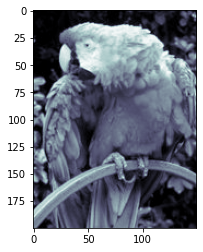

(200, 150)

In [164]:
img = plt.imread("img.jpg")
plt.imshow(img, cmap=plt.cm.bone)
plt.show()
img.shape

In [165]:
rows , cols = img.shape

In [166]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
fotrans = np.fft.fftshift(dft)
mag = 20*np.log(cv2.magnitude(fotrans[:,:,0],fotrans[:,:,1]))

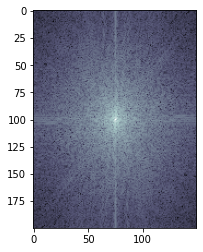

(200, 150)

In [167]:
plt.imshow(mag, cmap=plt.cm.bone)
plt.show()
img.shape

## Frequency Domain Smoothing Filters

In [168]:
D_0 = 20

In [169]:
def Distance(rows,cols,u,v):
    dist = math.sqrt((u-rows/2)**2 + (v-cols/2)**2)
    
    return dist

### #1 Ideal Low Pass Filter

In [170]:
def IdealLowPass(D_0,dist):
    if dist <= D_0:
        return 1
    else:
        return 0

In [171]:
ideallpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [172]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = IdealLowPass(D_0,dist)
        
        ideallpf[u][v] = H_uv

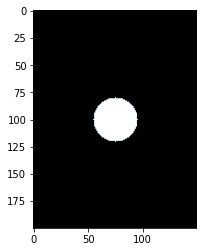

In [173]:
magspec = cv2.magnitude(ideallpf[:,:,0],ideallpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [174]:
fshift = fotrans*ideallpf
f_ishift = np.fft.ifftshift(fshift)
imgideallpf = cv2.idft(f_ishift)
imgideallpf = cv2.magnitude(imgideallpf[:,:,0],imgideallpf[:,:,1])

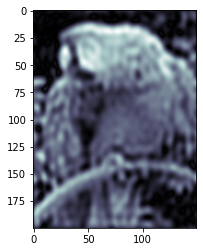

In [175]:
plt.imshow(imgideallpf, cmap=plt.cm.bone)
plt.show()

### #2 Butterworth Low Pass Filter

In [176]:
def ButterworthLowPass(D_0,dist,n):
    return (1/(1+(dist/D_0)**(2*n)))

In [177]:
butterlpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [178]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,1)
        
        butterlpf[u][v] = H_uv

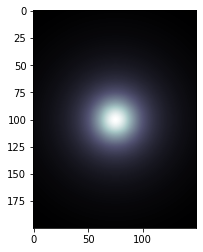

In [179]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [180]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

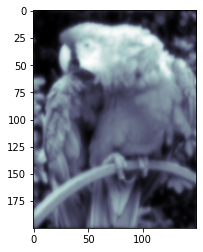

In [181]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

### #3 Gaussian Low Pass Filter

In [182]:
def GaussianLowPass(D_0,dist):
    return (math.exp(-1*((dist)**2)/(2*(D_0**2))))

In [183]:
glpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [184]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

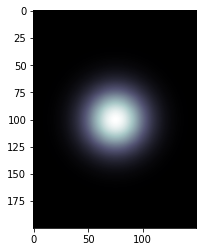

In [185]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [186]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

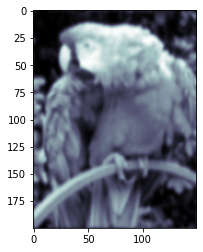

In [187]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

#### For the given cut-off frequency value D_0 = 20, We clearly see the smoothing quality: 
#### Gaussian Low Pass Filter > Butterworth Low Pass Filter > Ideal Low Pass Filter

## Ringing Effect of Ideal Low Pass Filter

In [188]:
D_0 = 25

In [189]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = IdealLowPass(D_0,dist)
        
        ideallpf[u][v] = H_uv

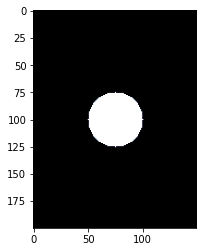

In [190]:
magspec = cv2.magnitude(ideallpf[:,:,0],ideallpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [191]:
fshift = fotrans*ideallpf
f_ishift = np.fft.ifftshift(fshift)
imgideallpf = cv2.idft(f_ishift)
imgideallpf = cv2.magnitude(imgideallpf[:,:,0],imgideallpf[:,:,1])

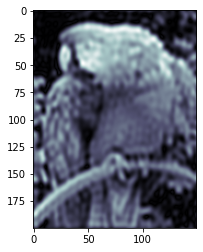

In [192]:
plt.imshow(imgideallpf, cmap=plt.cm.bone)
plt.show()

#### The rippling artifact around the edges of the objects in the image is the 'ringing effect'.

## Butterworth Low Pass Filters for different cut-off frequencies (n = 2)

In [193]:
n = 2

### For D_0 = 5

In [194]:
D_0 = 5

In [195]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,n)
        
        butterlpf[u][v] = H_uv

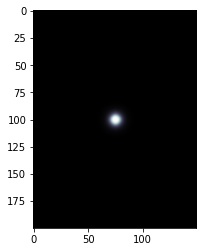

In [196]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [197]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

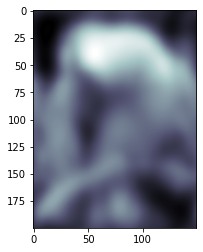

In [198]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 15

In [199]:
D_0 = 15

In [200]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,n)
        
        butterlpf[u][v] = H_uv

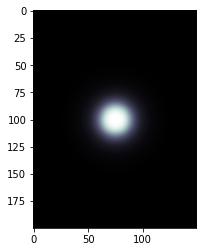

In [201]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [202]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

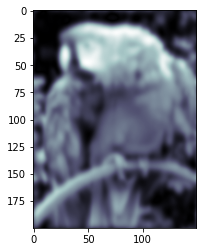

In [203]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 30

In [204]:
D_0 = 30

In [205]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,n)
        
        butterlpf[u][v] = H_uv

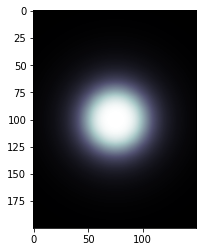

In [206]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [207]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

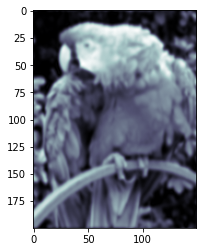

In [208]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 90

In [209]:
D_0 = 90

In [210]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,n)
        
        butterlpf[u][v] = H_uv

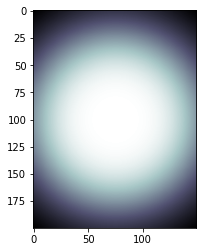

In [211]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [212]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

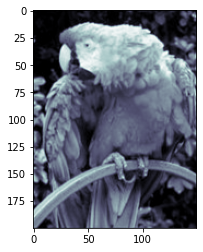

In [213]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 120

In [214]:
D_0 = 120

In [215]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = ButterworthLowPass(D_0,dist,n)
        
        butterlpf[u][v] = H_uv

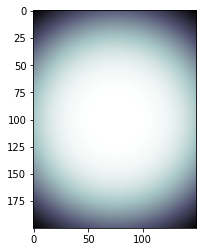

In [216]:
magspec = cv2.magnitude(butterlpf[:,:,0],butterlpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [217]:
fshift = fotrans*butterlpf
f_ishift = np.fft.ifftshift(fshift)
imgbutterlpf = cv2.idft(f_ishift)
imgbutterlpf = cv2.magnitude(imgbutterlpf[:,:,0],imgbutterlpf[:,:,1])

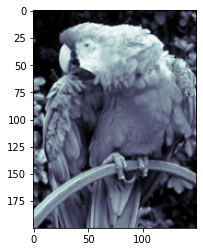

In [218]:
plt.imshow(imgbutterlpf, cmap=plt.cm.bone)
plt.show()

## Gaussian Low Pass Filters for different cut-off frequencies

### For D_0 = 5

In [219]:
D_0 = 5

In [220]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

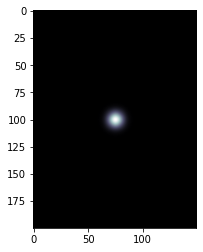

In [221]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [222]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

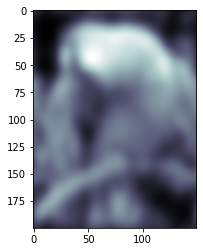

In [223]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

### D_0 = 15

In [224]:
D_0 = 15

In [225]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

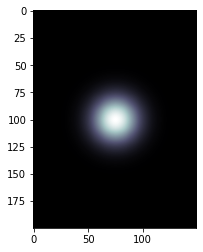

In [226]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [227]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

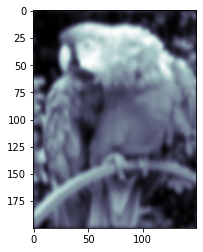

In [228]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 30

In [229]:
D_0 = 30

In [230]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

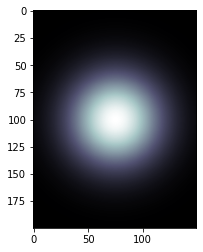

In [231]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [232]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

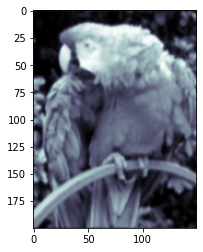

In [233]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 90

In [234]:
D_0 = 90

In [235]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

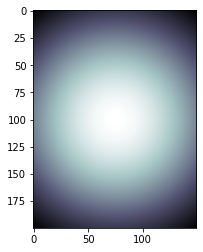

In [236]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [237]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

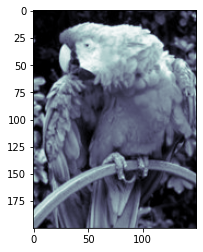

In [238]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 120

In [239]:
D_0 = 120

In [240]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GaussianLowPass(D_0,dist)
        
        glpf[u][v] = H_uv

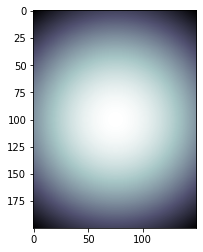

In [241]:
magspec = cv2.magnitude(glpf[:,:,0],glpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [242]:
fshift = fotrans*glpf
f_ishift = np.fft.ifftshift(fshift)
imgglpf = cv2.idft(f_ishift)
imgglpf = cv2.magnitude(imgglpf[:,:,0],imgglpf[:,:,1])

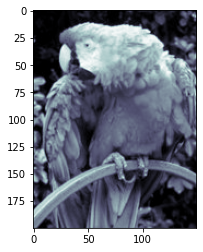

In [243]:
plt.imshow(imgglpf, cmap=plt.cm.bone)
plt.show()

## Frequency Domain Sharpening Filters

In [244]:
D_0 = 20

### #1 Ideal High Pass Filter

In [245]:
def IHPFTransFunc(D_0,dist):
    if dist <= D_0:
        return 0
    else:
        return 1

In [246]:
ihpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [247]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = IHPFTransFunc(D_0,dist)
        
        ihpf[u][v] = H_uv

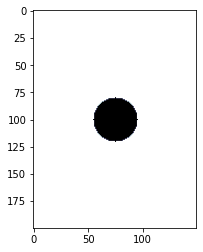

In [248]:
magspec = cv2.magnitude(ihpf[:,:,0],ihpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [249]:
fshift = fotrans*ihpf
f_ishift = np.fft.ifftshift(fshift)
imgihpf = cv2.idft(f_ishift)
imgihpf = cv2.magnitude(imgihpf[:,:,0],imgihpf[:,:,1])

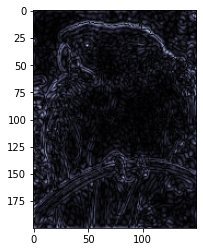

In [250]:
plt.imshow(imgihpf, cmap=plt.cm.bone)
plt.show()

### #2 Butterworth High Pass Filter

In [251]:
def BHPFTransFunc(D_0,dist,n):
    return (1/(1+(D_0/dist)**(2*n)))

In [252]:
bhpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [253]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,1)
            bhpf[u][v] = H_uv

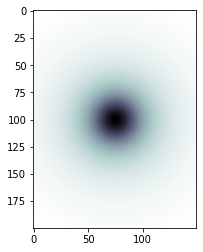

In [254]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [255]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

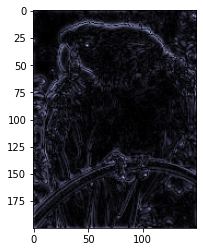

In [256]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

### #3 Gaussian High Pass Filter

In [257]:
def GHPFTransFunc(D_0,dist):
    return (1 - math.exp(-1*((dist)**2)/(2*(D_0**2))))

In [258]:
ghpf = np.zeros((rows,cols,2))
magspec = np.zeros((rows,cols,2))

In [259]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

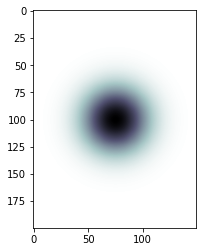

In [260]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [261]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

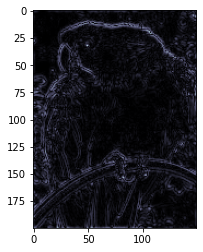

In [262]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()

#### For the given cut-off frequency value D_0 = 20, We clearly see the sharpening quality: 
#### Gaussian High Pass Filter > Butterworth High Pass Filter > Ideal High Pass Filter

## Ringing Effect of Ideal High Pass Filter

In [263]:
D_0 = 25

In [264]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = IHPFTransFunc(D_0,dist)
        
        ihpf[u][v] = H_uv

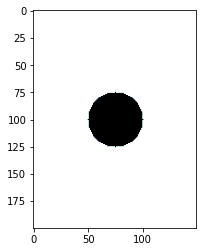

In [265]:
magspec = cv2.magnitude(ihpf[:,:,0],ihpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [266]:
fshift = fotrans*ihpf
f_ishift = np.fft.ifftshift(fshift)
imgihpf = cv2.idft(f_ishift)
imgihpf = cv2.magnitude(imgihpf[:,:,0],imgihpf[:,:,1])

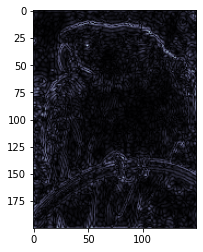

In [267]:
plt.imshow(imgihpf, cmap=plt.cm.bone)
plt.show()

#### The rippling artifact around the edges of the objects in the image is the 'ringing effect'.

## Butterworth High Pass Filters for different cut-off frequencies (n = 2)

In [268]:
n = 2

### For D_0 = 5

In [269]:
D_0 = 5

In [270]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,n)
            bhpf[u][v] = H_uv

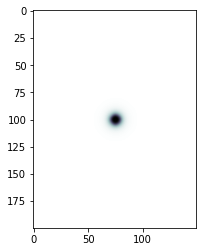

In [271]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [272]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

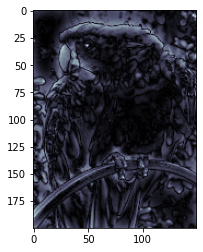

In [273]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 15

In [274]:
D_0 = 15

In [275]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,n)
            bhpf[u][v] = H_uv

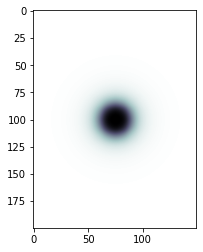

In [276]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [277]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

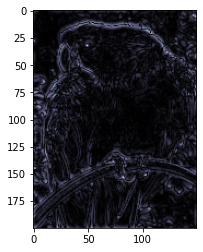

In [278]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 30

In [279]:
D_0 = 30

In [280]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,n)
            bhpf[u][v] = H_uv

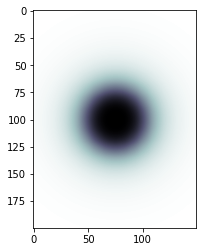

In [281]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [282]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

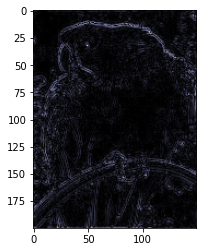

In [283]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 90

In [284]:
D_0 = 90

In [285]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,n)
            bhpf[u][v] = H_uv

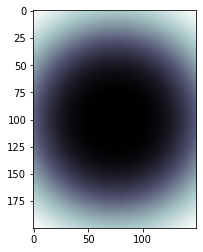

In [286]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [287]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

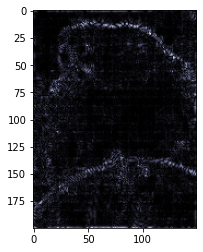

In [288]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 120

In [289]:
D_0 = 120

In [290]:
for u in range(rows):
    for v in range(cols):
        if (u == rows/2 and v == cols/2):
            bhpf[u][v] = 0
        else:
            dist = Distance(rows,cols,u,v)
            H_uv = BHPFTransFunc(D_0,dist,n)
            bhpf[u][v] = H_uv

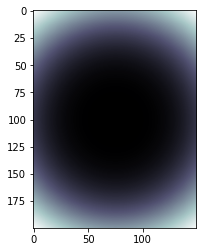

In [291]:
magspec = cv2.magnitude(bhpf[:,:,0],bhpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [292]:
fshift = fotrans*bhpf
f_ishift = np.fft.ifftshift(fshift)
imgbhpf = cv2.idft(f_ishift)
imgbhpf = cv2.magnitude(imgbhpf[:,:,0],imgbhpf[:,:,1])

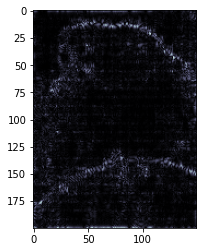

In [293]:
plt.imshow(imgbhpf, cmap=plt.cm.bone)
plt.show()

## Gaussian High Pass Filters for different cut-off frequencies

### For D_0 = 5

In [294]:
D_0 = 5

In [295]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

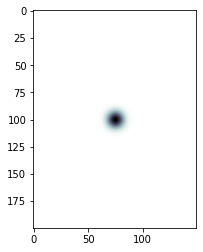

In [296]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [297]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

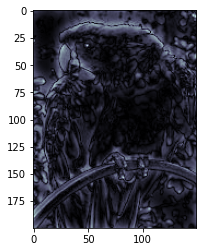

In [298]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 15

In [299]:
D_0 = 15

In [300]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

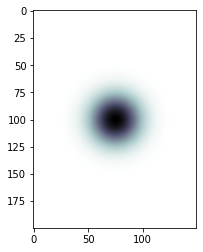

In [301]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [302]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

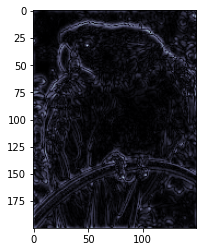

In [303]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 30

In [304]:
D_0 = 30

In [305]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

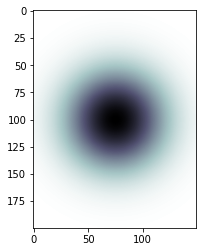

In [306]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [307]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

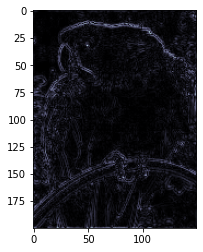

In [308]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 90

In [309]:
D_0 = 90

In [310]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

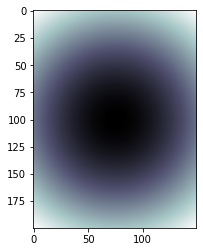

In [311]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [312]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

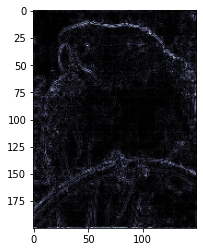

In [313]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()

### For D_0 = 120

In [314]:
D_0 = 120

In [315]:
for u in range(rows):
    for v in range(cols):
        dist = Distance(rows,cols,u,v)
        H_uv = GHPFTransFunc(D_0,dist)
        
        ghpf[u][v] = H_uv

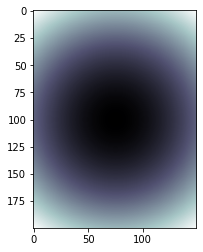

In [316]:
magspec = cv2.magnitude(ghpf[:,:,0],ghpf[:,:,1])
plt.imshow(magspec, cmap=plt.cm.bone)
plt.show()

In [317]:
fshift = fotrans*ghpf
f_ishift = np.fft.ifftshift(fshift)
imgghpf = cv2.idft(f_ishift)
imgghpf = cv2.magnitude(imgghpf[:,:,0],imgghpf[:,:,1])

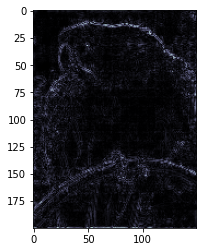

In [319]:
plt.imshow(imgghpf, cmap=plt.cm.bone)
plt.show()